In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
#%matplotlib inline
%matplotlib notebook
from ipywidgets import interact
import matplotlib.patches as patch
from shapely.geometry import MultiPoint
from descartes.patch import PolygonPatch
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay
from shapely.ops import cascaded_union, polygonize
import shapely.geometry as geometry

In [2]:
def tcos(a,b,c):
    return ((b**2+c**2-a**2)/(2*b*c))

In [3]:
def tsin(t):
    return(1-t**2)

In [4]:
def plot_polygon(polygon,X,Y):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    margin = .3
    x_min, y_min, x_max, y_max = polygon.bounds
    ax.set_xlim([x_min-margin, x_max+margin])
    ax.set_ylim([y_min-margin, y_max+margin])
    patch = PolygonPatch(polygon, fc='#999999',
                         ec='#000000', fill=True,
                         zorder=-1)
    dir(ax)
    ax.scatter(X,Y, color='#f16824')
    ax.add_patch(patch)
    return fig

In [13]:
def alpha_shape(points, alpha):
    def add_edge(edges, edge_points, coords, i, j):
            if (i, j) in edges or (j, i) in edges:
                return
            edges.add( (i, j) )
            edge_points.append(coords[ [i, j] ])
    coords = points
    tri = Delaunay(coords)
    edges = set()
    edge_points = []
    for ia, ib, ic in tri.vertices:
        pa = coords[ia]
        pb = coords[ib]
        pc = coords[ic]
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)
        s = (a + b + c)/2.0
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))
        circum_r = a*b*c/(4.0*area)
        if circum_r < 1.0/alpha:
            add_edge(edges, edge_points, coords, ia, ib)
            add_edge(edges, edge_points, coords, ib, ic)
            add_edge(edges, edge_points, coords, ic, ia)
    m = geometry.MultiLineString(edge_points)
    triangles = list(polygonize(m))
    return cascaded_union(triangles), edge_points, m
#concave_hull, edge_points = alpha_shape(points,alpha=1.87)

In [36]:
def f(l1_l,l2_l,l1_h,l2_h,d):
    A=[]
    X=[]
    Y=[]
    if (d+l1_l>l2_h) & (d+l2_l>l1_h) & (l1_l+l2_l>d) & (l1_l<l1_h) & (l2_l<l2_h):
        plt.close()
        l1=np.linspace(l1_l,l1_h,10)
        l2=np.linspace(l2_l,l2_h,10)
        for i in range(0,len(l1)):
            for j in range(0,len(l2)):
                X.append(tcos(l2[j],l1[i],d)*l1[i])
                Y.append(tsin(tcos(l2[j],l1[i],d))*l1[i])
        #fig = pl.figure(figsize=(10,10))
        #ax = fig.add_subplot(111)
        #plt.scatter(X, Y)
        A=np.column_stack((X,Y))
        concave_hull, edge_points, m = alpha_shape(A,alpha=1)
        #_ = plot_polygon(concave_hull,X,Y)
        for i in range(len(edge_points)):
            #for j in range(2):
            plt.scatter(edge_points[i][1][0],edge_points[i][1][1])
        print(len(edge_points))
        print(edge_points[260][0][0])
        #plt.plot(edge_points)
        #qq=patch.Polygon(A)
        #hull=ConvexHull(A)
        #for simplex in hull.simplices:
        #    plt.plot(A[simplex, 0], A[simplex, 1], 'k-')
        #tri = Delaunay(A)
       # plt.triplot(A[:,0], A[:,1], tri.simplices.copy())
        #plt.plot(A[:,0], A[:,1], 'o')
        #plt.show()
    else:
        print('Неверные данные')

In [37]:
#A=[]
#X=[]
#Y=[]
interact(f, l1_l=(3,15), l2_l=(3,15), l1_h=(5,20), l2_h=(5,20), d=(3,15))

A Jupyter Widget

<function __main__.f>

In [33]:
dir(X)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

3.54035308974
7.7739372264


<IPython.core.display.Javascript object>


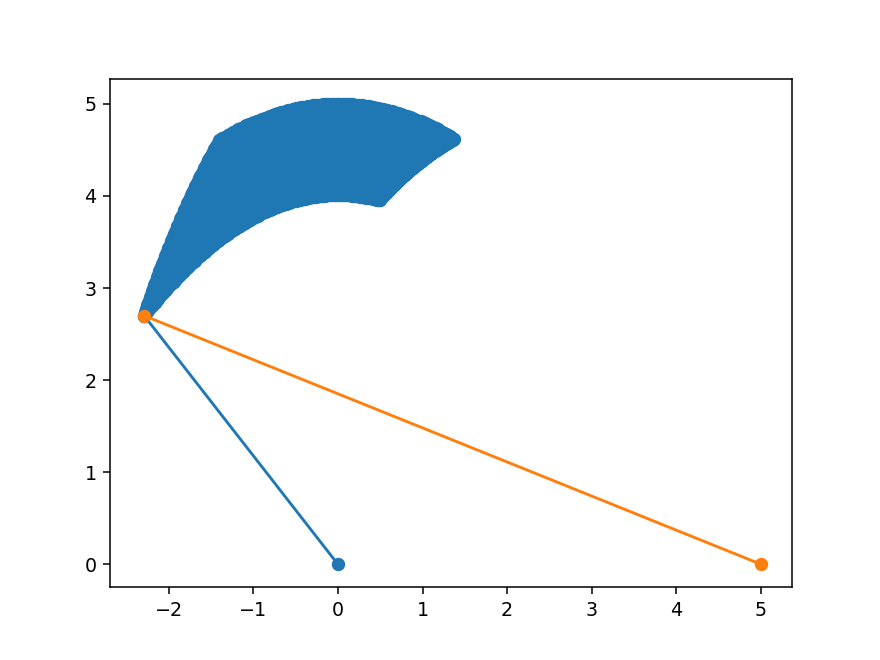

In [188]:
ax=-2.29
ay=2.7
x1, y1 = [0, ax], [0, ay]
x2, y2 = [ax, d], [ay, 0]
#xc, yc=[tcos(l2,l1,d)*l1], [tsin(tcos(l2,l1,d))]
print(np.sqrt((x1[1]-x1[0])**2+(y1[1]-y1[0])**2))
print(np.sqrt((x2[1]-x2[0])**2+(y2[1]-y2[0])**2))
plt.plot(x1, y1, x2, y2, marker = 'o')

In [14]:
points=A

def alpha_shape(points, alpha):
    """
    Compute the alpha shape (concave hull) of a set
    of points.
    @param points: Iterable container of points.
    @param alpha: alpha value to influence the
        gooeyness of the border. Smaller numbers
        don't fall inward as much as larger numbers.
        Too large, and you lose everything!
    """
    if len(points) < 4:
        # When you have a triangle, there is no sense
        # in computing an alpha shape.
        return geometry.MultiPoint(list(points)).convex_hull
    def add_edge(edges, edge_points, coords, i, j):
            if (i, j) in edges or (j, i) in edges:
                # already added
                return
            edges.add( (i, j) )
            edge_points.append(coords[ [i, j] ])
    coords = points#np.array([point.coords[0] for point in points])
    tri = Delaunay(coords)
    edges = set()
    edge_points = []
    # loop over triangles:
    # ia, ib, ic = indices of corner points of the
    # triangle
    for ia, ib, ic in tri.vertices:
        pa = coords[ia]
        pb = coords[ib]
        pc = coords[ic]
        # Lengths of sides of triangle
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)
        # Semiperimeter of triangle
        s = (a + b + c)/2.0
        # Area of triangle by Heron's formula
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))
        circum_r = a*b*c/(4.0*area)
        # Here's the radius filter.
        #print circum_r
        if circum_r < 1.0/alpha:
            add_edge(edges, edge_points, coords, ia, ib)
            add_edge(edges, edge_points, coords, ib, ic)
            add_edge(edges, edge_points, coords, ic, ia)
    m = geometry.MultiLineString(edge_points)
    triangles = list(polygonize(m))
    return cascaded_union(triangles), edge_points, m, coords
concave_hull, edge_points, m, coords = alpha_shape(points,alpha=1.87)
_ = plot_polygon(concave_hull, X, Y)
_ = plt.plot(X,Y,'o', color='#f16824')

ValueError: not enough values to unpack (expected 4, got 0)

In [33]:
for i in range(1,len(edge_points)):
    print(edge_points[0][0])
    print(edge_points[i][])

[[ 4.70914127 10.15199904]
 [ 4.70637119  9.97166675]]
[[4.70637119 9.97166675]
 [4.91551247 9.9864781 ]]
[[ 4.91551247  9.9864781 ]
 [ 4.70914127 10.15199904]]
[[4.01385042 7.20988943]
 [4.00554017 7.40592526]]
[[4.00554017 7.40592526]
 [3.84626039 7.35625345]]
[[3.84626039 7.35625345]
 [4.01385042 7.20988943]]
[[5.67313019 6.92034796]
 [5.69252078 7.10576783]]
[[5.69252078 7.10576783]
 [5.51385042 7.09667784]]
[[5.51385042 7.09667784]
 [5.67313019 6.92034796]]
[[6.28254848 8.71079872]
 [6.0734072  8.72726426]]
[[6.0734072  8.72726426]
 [6.25761773 8.53544832]]
[[6.25761773 8.53544832]
 [6.28254848 8.71079872]]
[[4.9099723  9.80633312]
 [4.70637119 9.97166675]]
[[4.70637119 9.97166675]
 [4.70360111 9.79072672]]
[[4.70360111 9.79072672]
 [4.9099723  9.80633312]]
[[4.9099723  9.80633312]
 [4.91551247 9.9864781 ]]
[[6.43490305 7.09400463]
 [6.40443213 6.91665452]]
[[6.40443213 6.91665452]
 [6.59418283 6.90352092]]
[[6.59418283 6.90352092]
 [6.43490305 7.09400463]]
[[3.43628809 8.40560386

 [6.30055402 7.46099997]]
[[6.30055402 7.46099997]
 [6.46537396 7.27063087]]
[[6.62742382 7.0786688 ]
 [6.46537396 7.27063087]]
[[6.46537396 7.27063087]
 [6.43490305 7.09400463]]
[[6.5567867  7.7964638 ]
 [6.38365651 7.99083479]]
[[6.35595568 7.81487809]
 [6.5567867  7.7964638 ]]
[[6.5567867  7.7964638 ]
 [6.58725762 7.97048397]]
[[6.27285319 7.2830216 ]
 [6.08310249 7.29037846]]
[[6.08310249 7.29037846]
 [6.24515235 7.1043096 ]]
[[6.24515235 7.1043096 ]
 [6.27285319 7.2830216 ]]
[[6.27285319 7.2830216 ]
 [6.46537396 7.27063087]]
[[6.30055402 7.46099997]
 [6.27285319 7.2830216 ]]
[[6.43490305 7.09400463]
 [6.27285319 7.2830216 ]]
[[5.87396122 7.11011835]
 [5.71191136 7.29028144]]
[[5.69252078 7.10576783]
 [5.87396122 7.11011835]]
[[5.85180055 6.92660495]
 [5.87396122 7.11011835]]
[[5.85180055 6.92660495]
 [6.033241   6.92812363]]
[[6.033241   6.92812363]
 [5.87396122 7.11011835]]
[[5.19806094 7.63045577]
 [5.01939058 7.61207902]]
[[5.18698061 7.44281217]
 [5.19806094 7.63045577]]
[[5.1

In [41]:
len(coords)

400

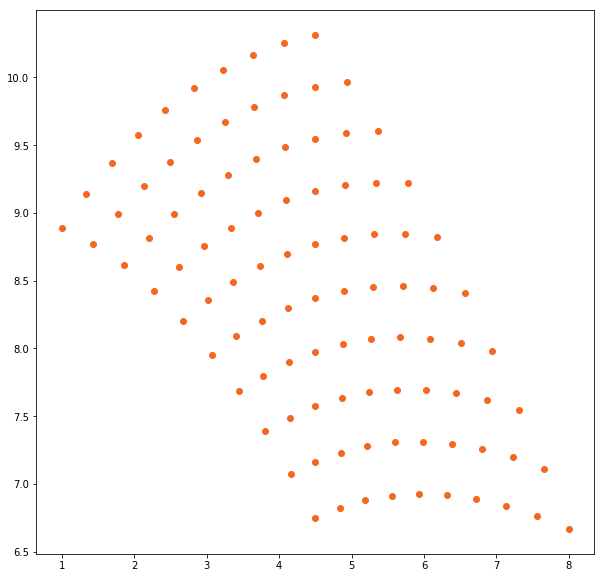

In [28]:
import pylab as pl
x = X
y = Y
pl.figure(figsize=(10,10))
_ = pl.plot(x,y,'o', color='#f16824')

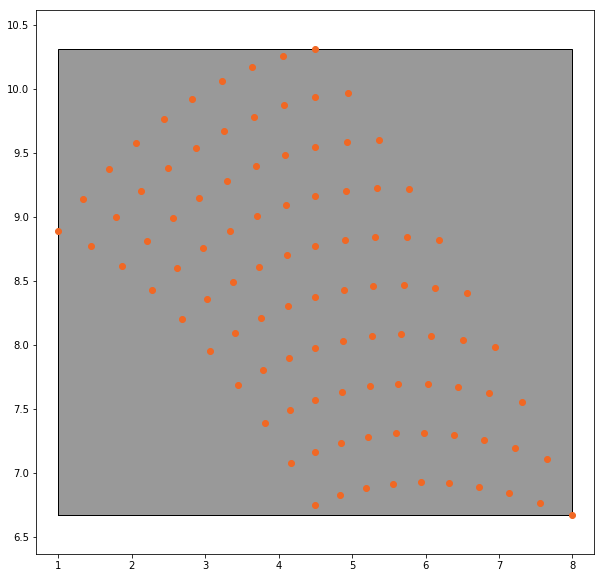

In [29]:
from descartes import PolygonPatch
def plot_polygon(polygon):
    fig = pl.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    margin = .3
    x_min, y_min, x_max, y_max = polygon.bounds
    ax.set_xlim([x_min-margin, x_max+margin])
    ax.set_ylim([y_min-margin, y_max+margin])
    patch = PolygonPatch(polygon, fc='#999999',
                         ec='#000000', fill=True,
                         zorder=-1)
    ax.add_patch(patch)
    return fig

_ = plot_polygon(point_collection.envelope)
_ = pl.plot(x,y,'o', color='#f16824')

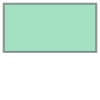

In [22]:
point_collection = geometry.MultiPoint(list(points))
point_collection.envelope

In [11]:
A

[]

In [62]:
len(X)

0

In [71]:
A=np.column_stack((X,Y))

In [80]:
type(X)


list

In [88]:
def rotate(A,B,C):
    return (B[0]-A[0])*(C[1]-B[1])-(B[1]-A[1])*(C[0]-B[0])

In [90]:
n = len(A) # число точек
P = list(range(n)) # список номеров точек
for i in range(1,n):
    if A[P[i]][0]<A[P[0]][0]: # если P[i]-ая точка лежит левее P[0]-ой точки
        P[i], P[0] = P[0], P[i]
for i in range(2,n):
    j = i
    while j>1 and (rotate(A[P[0]],A[P[j-1]],A[P[j]])<0): 
        P[j], P[j-1] = P[j-1], P[j]
        j -= 1

In [94]:
P

[99,
 0,
 1,
 2,
 100,
 3,
 101,
 4,
 102,
 200,
 5,
 103,
 201,
 6,
 104,
 202,
 300,
 7,
 105,
 203,
 301,
 8,
 106,
 400,
 204,
 302,
 9,
 107,
 401,
 205,
 303,
 10,
 108,
 500,
 206,
 402,
 304,
 11,
 109,
 501,
 207,
 403,
 305,
 12,
 600,
 110,
 502,
 208,
 404,
 306,
 13,
 601,
 111,
 503,
 209,
 405,
 307,
 14,
 700,
 112,
 602,
 504,
 210,
 406,
 308,
 15,
 701,
 113,
 603,
 211,
 505,
 309,
 407,
 800,
 16,
 702,
 114,
 604,
 212,
 506,
 310,
 408,
 801,
 17,
 703,
 115,
 605,
 900,
 213,
 507,
 311,
 409,
 18,
 802,
 704,
 116,
 606,
 214,
 901,
 508,
 312,
 410,
 19,
 803,
 1000,
 117,
 705,
 607,
 215,
 902,
 509,
 313,
 411,
 20,
 804,
 1001,
 118,
 706,
 216,
 608,
 903,
 510,
 314,
 412,
 21,
 1100,
 805,
 119,
 1002,
 707,
 217,
 609,
 315,
 904,
 511,
 22,
 413,
 1101,
 806,
 120,
 1003,
 1200,
 708,
 218,
 610,
 23,
 316,
 512,
 905,
 414,
 1102,
 807,
 121,
 1004,
 1201,
 709,
 219,
 24,
 611,
 317,
 513,
 415,
 906,
 1300,
 1103,
 122,
 808,
 1005,
 1202,
 710,
 2

In [ ]:
def convex_hull_graham(points):
    '''
    Returns points on convex hull in CCW order according to Graham's scan algorithm. 
    By Tom Switzer <thomas.switzer@gmail.com>.
    '''
    TURN_LEFT, TURN_RIGHT, TURN_NONE = (1, -1, 0)

    def cmp(a, b):
        return (a > b) - (a < b)

    def turn(p, q, r):
        return cmp((q[0] - p[0])*(r[1] - p[1]) - (r[0] - p[0])*(q[1] - p[1]), 0)

    def _keep_left(hull, r):
        while len(hull) > 1 and turn(hull[-2], hull[-1], r) != TURN_LEFT:
            hull.pop()
        if not len(hull) or hull[-1] != r:
            hull.append(r)
        return hull

    points = sorted(points)
    l = reduce(_keep_left, points, [])
    u = reduce(_keep_left, reversed(points), [])
    return l.extend(u[i] for i in range(1, len(u) - 1)) or l

In [85]:
Q=convex_hull_graham(c)

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [81]:
c = [(X[i], Y[i]) for i in range(0,len(X))]

In [83]:
type(c)

list

In [35]:
Q

range(0, 0)

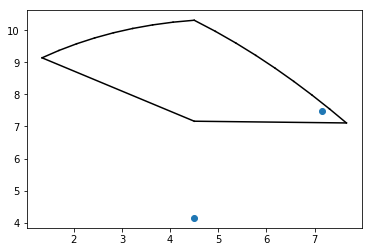

In [9]:
plt.plot(A[0], A[1], 'o')
for simplex in hull.simplices:
    plt.plot(A[simplex, 0], A[simplex, 1], 'k-')

In [61]:
hull.vertices

array([  98,    0, 9702, 9703, 9704, 9705, 9706, 9707, 9708, 9709, 9710,
       9711, 9712, 9713, 9714, 9715, 9716, 9717, 9718, 9719, 9720, 9721,
       9722, 9723, 9724, 9725, 9726, 9727, 9728, 9729, 9730, 9731, 9732,
       9733, 9734, 9735, 9736, 9737, 9738, 9739, 9740, 9741, 9742, 9743,
       9744, 9745, 9746, 9747, 9748, 9749, 9750, 9751, 9752, 9753, 9754,
       9755, 9756, 9757, 9758, 9759, 9760, 9761, 9762, 9763, 9764, 9765,
       9766, 9767, 9768, 9769, 9770, 9771, 9772, 9773, 9774, 9775, 9776,
       9777, 9778, 9779, 9780, 9781, 9782, 9783, 9784, 9785, 9786, 9787,
       9788, 9789, 9790, 9791, 9792, 9793, 9794, 9795, 9796, 9797, 9798,
       9799, 9800, 9701, 9602, 9503, 9404, 9305, 9206, 9107, 9008, 8909,
       8810, 8711, 8612, 8513, 8414, 8315, 8216, 8117, 8018, 7919, 7820,
       7721, 7622, 7523, 7424, 7325, 7226, 7127, 7028, 6929, 6830, 6731,
       6632, 6533, 6434, 6335, 6236, 6137, 6038, 5939, 5840, 5741, 5642,
       5543, 5444, 5345, 5246, 5147, 5048, 4949, 48

In [42]:
c = [(X[i], Y[i]) for i in range(0,len(X))]
g = MultiPoint(c)
hull1=g.convex_hull

<IPython.core.display.Javascript object>


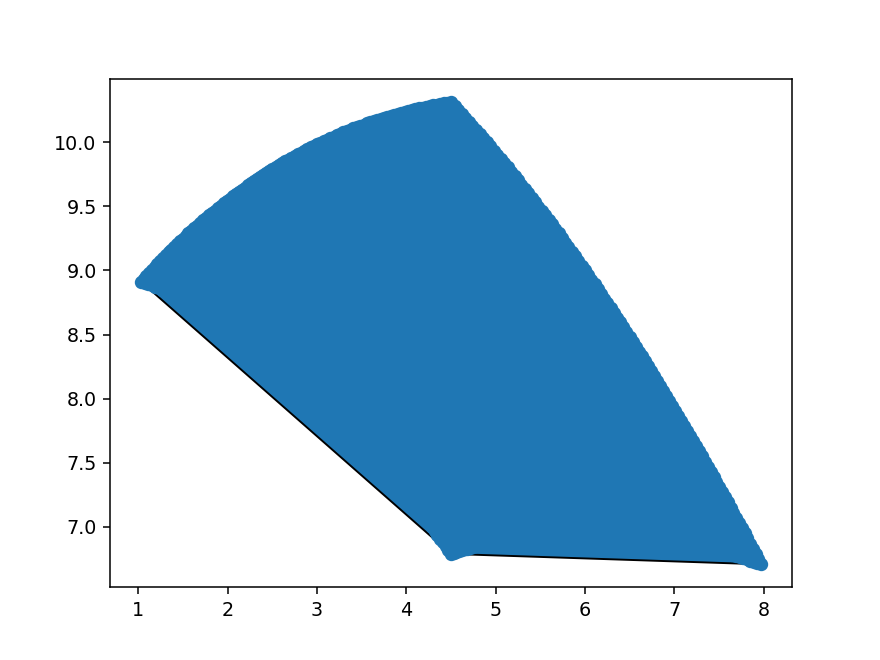

In [45]:
from descartes.patch import PolygonPatch
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
patch1 = PolygonPatch(hull1)
ax.add_patch(patch1)

In [53]:
points = np.random.rand(30, 2)

In [54]:
points

array([[0.87056647, 0.85954044],
       [0.20503389, 0.57112813],
       [0.74142755, 0.89229549],
       [0.17417623, 0.71683714],
       [0.38722181, 0.35915262],
       [0.57159058, 0.31937878],
       [0.4356236 , 0.88464645],
       [0.43614855, 0.94118426],
       [0.578378  , 0.95972667],
       [0.80906588, 0.3712975 ],
       [0.03227412, 0.53107008],
       [0.4376858 , 0.90197687],
       [0.84246662, 0.12813971],
       [0.40617867, 0.20153464],
       [0.82039686, 0.55254195],
       [0.82672025, 0.06935801],
       [0.67327536, 0.60514218],
       [0.99104656, 0.50459053],
       [0.31528849, 0.89441426],
       [0.95512982, 0.72009331],
       [0.52303818, 0.29189871],
       [0.06971155, 0.63983014],
       [0.90661599, 0.01520548],
       [0.57263565, 0.8741488 ],
       [0.7977272 , 0.04327263],
       [0.54950051, 0.88444395],
       [0.76863897, 0.60652432],
       [0.81966965, 0.21660209],
       [0.8186145 , 0.51234697],
       [0.43317039, 0.38504234]])

In [30]:
import numpy as np
from bokeh.plotting import figure, output_notebook, show

In [31]:
def split(u, v, points):
    # return points on left side of UV
    return [p for p in points if np.cross(p - u, v - u) < 0]

def extend(u, v, points):
    if not points:
        return []

    # find furthest point W, and split search to WV, UW
    w = min(points, key=lambda p: np.cross(p - u, v - u))
    p1, p2 = split(w, v, points), split(u, w, points)
    return extend(w, v, p1) + [w] + extend(u, w, p2)

def convex_hull(points):
    # find two hull points, U, V, and split to left and right search
    u = min(points, key=lambda p: p[0])
    v = max(points, key=lambda p: p[0])
    left, right = split(u, v, points), split(v, u, points)
    
    # find convex hull on each side
    return [v] + extend(u, v, left) + [u] + extend(v, u, right) + [v]

In [32]:
points=A
hull = np.array(convex_hull(points))
hull

array([[ 7.66049383,  7.10973619],
       [ 7.30864198,  7.54864604],
       [ 6.94444444,  7.98122428],
       [ 6.56790123,  8.40522278],
       [ 6.17901235,  8.8183172 ],
       [ 5.77777778,  9.218107  ],
       [ 5.36419753,  9.6021154 ],
       [ 4.9382716 ,  9.96778946],
       [ 4.5       , 10.3125    ],
       [ 4.0617284 , 10.25258345],
       [ 3.63580247, 10.16694572],
       [ 3.22222222, 10.05611672],
       [ 2.82098765,  9.92060685],
       [ 2.43209877,  9.76090387],
       [ 2.05555556,  9.57746914],
       [ 1.69135802,  9.37073301],
       [ 1.33950617,  9.14108939],
       [ 4.5       ,  7.16369048],
       [ 7.66049383,  7.10973619]])

In [33]:
output_notebook()

plot = figure()
plot.scatter(x=points[:, 0], y=points[:, 1])
plot.line(x=hull[:, 0], y=hull[:, 1], color='red')

show(plot)

Loading BokehJS ...